# 1. Importing Library an Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statistics as st
import datetime
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from matplotlib.colors import ListedColormap
from sklearn import metrics
import warnings
import sys

In [2]:
df = pd.read_csv('marketing_campaign.csv',sep="\t")
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

# 2. Data Cleaning

## 2.1. Missing Value

In [4]:
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [5]:
df = df.dropna(axis=0)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2216 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2216 non-null   int64  
 1   Year_Birth           2216 non-null   int64  
 2   Education            2216 non-null   object 
 3   Marital_Status       2216 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2216 non-null   int64  
 6   Teenhome             2216 non-null   int64  
 7   Dt_Customer          2216 non-null   object 
 8   Recency              2216 non-null   int64  
 9   MntWines             2216 non-null   int64  
 10  MntFruits            2216 non-null   int64  
 11  MntMeatProducts      2216 non-null   int64  
 12  MntFishProducts      2216 non-null   int64  
 13  MntSweetProducts     2216 non-null   int64  
 14  MntGoldProds         2216 non-null   int64  
 15  NumDealsPurchases    2216 non-null   i

## 2.2. Convert date format column to datetime data type

In [6]:
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])

In [7]:
dates = []
for date in df["Dt_Customer"]:
    date = date.date()
    dates.append(date)

print("Fist Time Customers Purchase : ",min(dates))
print("Last Time Customers Purchase : ",max(dates))

Fist Time Customers Purchase :  2012-01-08
Last Time Customers Purchase :  2014-12-06


In [8]:
df["Marital_Status"].value_counts()

Married     857
Together    573
Single      471
Divorced    232
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64

In [9]:
df["Education"].value_counts()

Graduation    1116
PhD            481
Master         365
2n Cycle       200
Basic           54
Name: Education, dtype: int64

# 3. EDA and Data Visualization

## 3.1. Basic Descriptive Statistics

### Now we will see how our data look like before we continue to explore them

In [10]:
def summary(df,column):
    print("Distinct : ",len(pd.unique(df[column])))
    print("Missing : ",df[column].isnull().sum())
    print("Sum : ",df[column].sum())
    print("Mode : ",st.mode(df[column]))
    print("stddev : ",np.std(df[column]))
    print("CV :",100*(np.std(df[column]))/(np.mean(df[column]))) #coefficient of variation
    print("Min : ",df[column].min())
    print("Max : ",df[column].max())
    print("Mean : ",df[column].mean())
    print("Q1 : ",np.quantile(df[column],0.25))
    print("Q1 : ",np.quantile(df[column],0.5))
    print("Q1 : ",np.quantile(df[column],0.75))

In [11]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [12]:
df_encode= df.copy()
for col in df_encode.select_dtypes(include='O').columns:
    df_encode[col]=le.fit_transform(df_encode[col])

In [13]:
for i in df_encode.drop(['Dt_Customer'],axis=1).columns:
    print (i,'\n')
    summary(df_encode.drop(['Dt_Customer'],axis=1),i)
    print("-"*30)

ID 

Distinct :  2216
Missing :  0
Sum :  12383791
Mode :  5524
stddev :  3248.6430295655437
CV : 58.13238412629254
Min :  0
Max :  11191
Mean :  5588.35333935018
Q1 :  2814.75
Q1 :  5458.5
Q1 :  8421.75
------------------------------
Year_Birth 

Distinct :  59
Missing :  0
Sum :  4362906
Mode :  1976
stddev :  11.982849470420215
CV : 0.6086309085378231
Min :  1893
Max :  1996
Mean :  1968.8203971119133
Q1 :  1959.0
Q1 :  1970.0
Q1 :  1977.0
------------------------------
Education 

Distinct :  5
Missing :  0
Sum :  5305
Mode :  2
stddev :  1.1238871292909483
CV : 46.94691571175761
Min :  0
Max :  4
Mean :  2.3939530685920576
Q1 :  2.0
Q1 :  2.0
Q1 :  3.0
------------------------------
Marital_Status 

Distinct :  8
Missing :  0
Sum :  8257
Mode :  3
stddev :  1.0774879698797502
CV : 28.917443880992202
Min :  0
Max :  7
Mean :  3.726083032490975
Q1 :  3.0
Q1 :  4.0
Q1 :  5.0
------------------------------
Income 

Distinct :  1974
Missing :  0
Sum :  115779909.0
Mode :  7500.0
stddev

### We can see from above the statistical behaviour of our data

# 4. Data Preprocessing

## 4.1. Feature Engineering

### I will add some additional features that might be useful for us and might give us insight

In [14]:
df['Age']=2021-df['Year_Birth']

In [15]:
df['Children_at_home']= df['Kidhome']+df['Teenhome']

In [16]:
df["Living_With"]=df["Marital_Status"].replace({"Married":"Partner", "Together":"Partner", "Absurd":"Alone", "Widow":"Alone", "YOLO":"Alone", "Divorced":"Alone", "Single":"Alone",})

df["Family_Size"] = df["Living_With"].replace({"Alone": 1, "Partner":2})+ df["Children_at_home"]

In [17]:
df=df.rename(columns={"MntWines": "Wines","MntFruits":"Fruits","MntMeatProducts":"Meat","MntFishProducts":"Fish","MntSweetProducts":"Sweets","MntGoldProds":"Gold"})


In [18]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,Wines,...,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Children_at_home,Living_With,Family_Size
0,5524,1957,Graduation,Single,58138.0,0,0,2012-04-09,58,635,...,0,0,0,3,11,1,64,0,Alone,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-08-03,38,11,...,0,0,0,3,11,0,67,2,Alone,3
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,0,0,0,3,11,0,56,0,Partner,2
3,6182,1984,Graduation,Together,26646.0,1,0,2014-10-02,26,11,...,0,0,0,3,11,0,37,1,Partner,3
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,0,0,0,3,11,0,40,1,Partner,3


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2216 entries, 0 to 2239
Data columns (total 33 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2216 non-null   int64         
 1   Year_Birth           2216 non-null   int64         
 2   Education            2216 non-null   object        
 3   Marital_Status       2216 non-null   object        
 4   Income               2216 non-null   float64       
 5   Kidhome              2216 non-null   int64         
 6   Teenhome             2216 non-null   int64         
 7   Dt_Customer          2216 non-null   datetime64[ns]
 8   Recency              2216 non-null   int64         
 9   Wines                2216 non-null   int64         
 10  Fruits               2216 non-null   int64         
 11  Meat                 2216 non-null   int64         
 12  Fish                 2216 non-null   int64         
 13  Sweets               2216 non-nul

### I will drop some columns that we might not use for analysis

In [20]:
df = df.drop(['ID','Z_CostContact','Z_Revenue'],axis=1)

## 4.2. Encoding data

In [21]:
df_new= df.copy()
for col in df_new.select_dtypes(include='O').columns:
    df_new[col]=le.fit_transform(df_new[col])

In [22]:
df_new.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,Wines,Fruits,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Children_at_home,Living_With,Family_Size
0,1957,2,4,58138.0,0,0,2012-04-09,58,635,88,...,0,0,0,0,0,1,64,0,0,1
1,1954,2,4,46344.0,1,1,2014-08-03,38,11,1,...,0,0,0,0,0,0,67,2,0,3
2,1965,2,5,71613.0,0,0,2013-08-21,26,426,49,...,0,0,0,0,0,0,56,0,1,2
3,1984,2,5,26646.0,1,0,2014-10-02,26,11,4,...,0,0,0,0,0,0,37,1,1,3
4,1981,4,3,58293.0,1,0,2014-01-19,94,173,43,...,0,0,0,0,0,0,40,1,1,3


## 4.3. Scaling Data

In [23]:
scaler = StandardScaler()

In [24]:
dfs = df_new.drop(['Dt_Customer','Year_Birth'],axis=1)

In [25]:
scaler.fit(dfs)
dfs = pd.DataFrame(scaler.transform(dfs),columns=dfs.columns)
dfs.head()

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Children_at_home,Living_With,Family_Size
0,-0.350527,0.254218,0.234063,-0.823039,-0.928972,0.310532,0.978226,1.549429,1.690227,2.454568,...,-0.282705,-0.280839,-0.261661,-0.117148,-0.097812,2.377952,0.986443,-1.264803,-1.348829,-1.758673
1,-0.350527,0.254218,-0.234559,1.039938,0.909066,-0.380509,-0.872024,-0.637328,-0.717986,-0.651038,...,-0.282705,-0.280839,-0.261661,-0.117148,-0.097812,-0.420530,1.236801,1.405806,-1.348829,0.450009
2,-0.350527,1.182303,0.769478,-0.823039,-0.928972,-0.795134,0.358511,0.569159,-0.178368,1.340203,...,-0.282705,-0.280839,-0.261661,-0.117148,-0.097812,-0.420530,0.318822,-1.264803,0.741384,-0.654332
3,-0.350527,1.182303,-1.017239,1.039938,-0.928972,-0.795134,-0.872024,-0.561922,-0.655551,-0.504892,...,-0.282705,-0.280839,-0.261661,-0.117148,-0.097812,-0.420530,-1.266777,0.070501,0.741384,0.450009
4,1.429011,-0.673866,0.240221,1.039938,-0.928972,1.554407,-0.391671,0.418348,-0.218505,0.152766,...,-0.282705,-0.280839,-0.261661,-0.117148,-0.097812,-0.420530,-1.016420,0.070501,0.741384,0.450009


## 4.4. Dimensionality Reduction Using Principal Component Analysis (PCA)

### Here i will reduce our features to three features

In [26]:
pca = PCA(n_components=3)
pca.fit(dfs)
PCA_dfs = pd.DataFrame(pca.transform(dfs), columns=(["col_reduction","col_reduction2", "col_reduction3"]))
PCA_dfs.describe().T

,count,mean,std,min,25%,50%,75%,max
col_reduction,2216.0,-1.743491e-16,2.695203,-5.769470,-2.286688,-0.754259,2.143057,7.842980
col_reduction2,2216.0,7.895810e-17,1.626316,-3.762114,-1.309107,-0.085233,1.131266,6.134189
col_reduction3,2216.0,7.074165e-17,1.389632,-3.318525,-0.698811,-0.149451,0.313799,8.875429


In [27]:
PCA_dfs

,col_reduction,col_reduction2,col_reduction3
0,4.324380,-0.616229,-0.268628
1,-2.697366,0.141589,-0.121949
2,2.015376,-0.414217,-1.173890
3,-2.414092,-1.453155,-0.014987
4,-0.576272,0.314062,-0.520872
...,...,...,...
2211,1.987966,1.831856,-1.394288
2212,-2.482778,4.554654,1.449696
2213,2.183324,-1.213780,1.108065
2214,1.444743,1.754015,-1.147630


### Then we can see our PCA data distribution in 3-D plot.

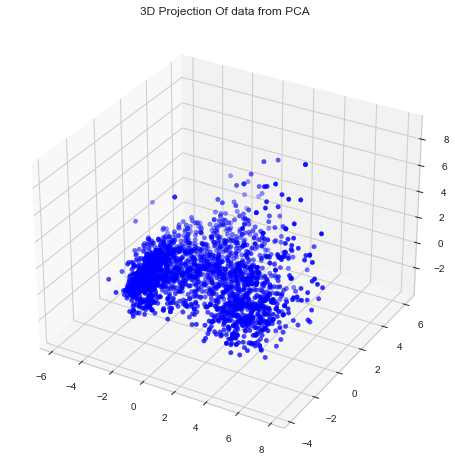

In [28]:
x =PCA_dfs["col_reduction"]
y =PCA_dfs["col_reduction2"]
z =PCA_dfs["col_reduction3"]
#To plot
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(x,y,z, c="blue", marker="o" )
ax.set_title("3D Projection Of data from PCA")
plt.show()

# 5. Clustering

## 1. Elbow Method

### Here we use elbow method to determine the optimal number of clusters

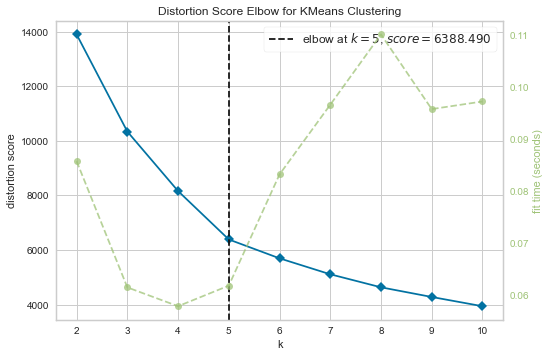

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [29]:
Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(PCA_dfs)
Elbow_M.show()

### We got our optimal number of clusters for our K-Means algorithm is five (5).

## 2. K-Means Clustering

In [30]:
kmeansmodel = KMeans(n_clusters= 5, init='k-means++', random_state=0)
y_kmeans= kmeansmodel.fit_predict(PCA_dfs)

In [31]:
PCA_dfs["Clusters"] = y_kmeans
#Adding the Clusters feature to the orignal dataframe.
df["Clusters"]= y_kmeans

In [32]:
PCA_dfs.head()

,col_reduction,col_reduction2,col_reduction3,Clusters
0,4.324380,-0.616229,-0.268628,2
1,-2.697366,0.141589,-0.121949,0
2,2.015376,-0.414217,-1.173890,2
3,-2.414092,-1.453155,-0.014987,3
4,-0.576272,0.314062,-0.520872,4


In [33]:
df.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,Wines,Fruits,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Children_at_home,Living_With,Family_Size,Clusters
0,1957,Graduation,Single,58138.0,0,0,2012-04-09,58,635,88,...,0,0,0,0,1,64,0,Alone,1,2
1,1954,Graduation,Single,46344.0,1,1,2014-08-03,38,11,1,...,0,0,0,0,0,67,2,Alone,3,0
2,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,...,0,0,0,0,0,56,0,Partner,2,2
3,1984,Graduation,Together,26646.0,1,0,2014-10-02,26,11,4,...,0,0,0,0,0,37,1,Partner,3,3
4,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,...,0,0,0,0,0,40,1,Partner,3,4


### Then we can plot our clusters distribution in 3-D plot.

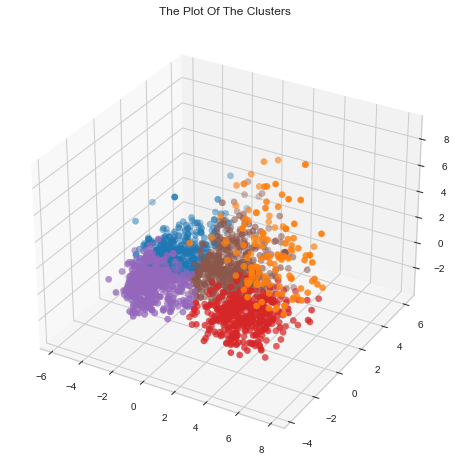

In [34]:
#Plotting the clusters
import matplotlib.cm as cmap
from matplotlib import colors
cmap = colors.ListedColormap(['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b'])
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d', label="bla")
ax.scatter(x, y, z, s=40, c=PCA_dfs["Clusters"], marker='o',cmap=cmap)
ax.set_title("The Plot Of The Clusters")
plt.show()

## 3. Model Evaluation

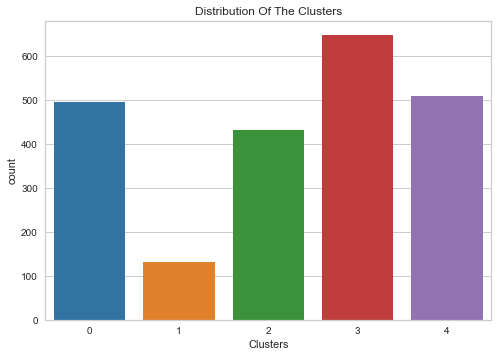

In [35]:
#Plotting countplot of clusters
pal = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728','#9467bd']
pl = sns.countplot(x=df["Clusters"], palette= pal)
pl.set_title("Distribution Of The Clusters")
plt.show()